In [178]:
import sys
import os
import pandas as pd
import importlib

import seaborn as sns
import matplotlib.pyplot as plt

sys.dont_write_bytecode = True

# Adiciona o diretório raiz do projeto ao sys.path
sys.path.append(os.path.abspath(os.path.join('.')))


In [179]:
import src.preprocessing
import src.model_utils
importlib.reload(src.preprocessing)
importlib.reload(src.model_utils)
from src.preprocessing import processar_dados
from src.model_utils import predict

In [180]:
df = pd.read_csv('./data/raw/base_pagamentos_teste.csv', sep=';')

In [181]:
sub = predict(df)

Imputação hierárquica coluna: FLAG_PF, com estratégia: mode
Imputação hierárquica coluna: PORTE, com estratégia: mode
Imputação hierárquica coluna: SEGMENTO_INDUSTRIAL, com estratégia: mode
Imputação hierárquica coluna: VALOR_A_PAGAR, com estratégia: median
Imputação hierárquica coluna: RENDA_MES_ANTERIOR, com estratégia: median
Imputação hierárquica coluna: NO_FUNCIONARIOS, com estratégia: median
Imputação hierárquica coluna: DOMINIO_EMAIL, com estratégia: mode
Imputação hierárquica coluna: CEP_2_DIG, com estratégia: mode
Imputação hierárquica coluna: TEMPO_DE_CASA_MESES, com estratégia: median


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 300 out of 300 | elapsed:    0.0s finished


In [182]:
sub

,ID_CLIENTE,SAFRA_REF,PROBABILIDADE_INADIMPLENCIA
74866,8784237149961904,2021-07,0.053081
74867,8784237149961904,2021-07,0.064297
77273,8784237149961904,2021-07,0.061653
77274,8784237149961904,2021-08,0.042645
77275,8784237149961904,2021-08,0.061905
...,...,...,...
84921,9206030810342980458,2021-11,0.094078
84922,9206030810342980458,2021-11,0.110089
84923,9206030810342980458,2021-11,0.080728
85916,9206030810342980458,2021-11,0.069316


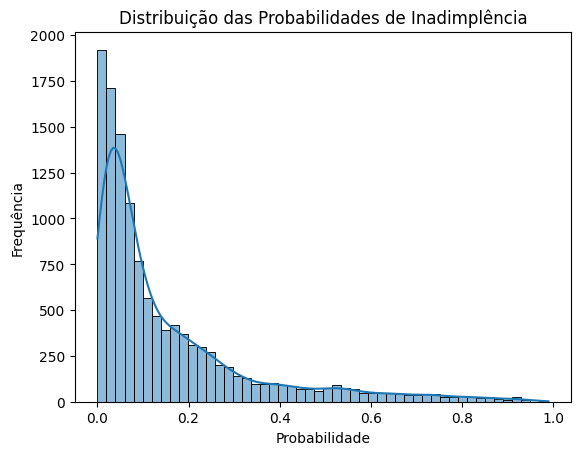

In [183]:
sns.histplot(sub['PROBABILIDADE_INADIMPLENCIA'], bins=50, kde=True)
plt.title('Distribuição das Probabilidades de Inadimplência')
plt.xlabel('Probabilidade')
plt.ylabel('Frequência')
plt.show()

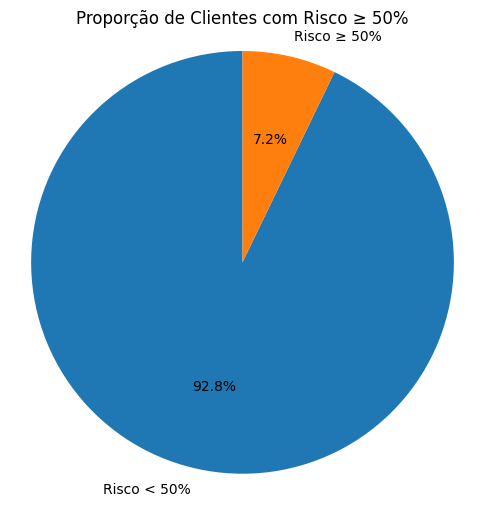

In [184]:
# Filtro para clientes com probabilidade >= 0.5
alto_risco = sub['PROBABILIDADE_INADIMPLENCIA'] >= 0.5

# Contagens
n_alto_risco = alto_risco.sum()
n_baixo_risco = len(sub) - n_alto_risco

# Dados para o gráfico
labels = ['Risco < 50%', 'Risco ≥ 50%']
sizes = [n_baixo_risco, n_alto_risco]

# Gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Proporção de Clientes com Risco ≥ 50%')
plt.axis('equal')
plt.show()